## 기온 예측 하기
* 실제로 이 방법으로 기온을 예측 하는것은 불가능해요.
* 데이터가 너무 적고, 기온에 영향을 미치는 특성들에 대한 데이터가 하나도 없기 때문이에요.
* 하지만 RNN은 이렇게 돌아간다를 보기위해서 진행하는 실습이니까 진행해주세요.

In [1]:
# 사용할 모듈들 import 해줄게요.
import numpy as np
import pandas as pd
from pprint import pprint

# 기온 그래프 그릴때 사용할거에요.
from matplotlib import pyplot as plt

# 이번에는 이정도만 사용할거에요.
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [2]:
# Pandas말고 일반 파이썬으로 데이터 읽어 볼게요.
data_path = '../data/'
file_name = '기온.csv'

# open() 함수는 파이썬 내장함수로 파일 읽고 쓸때 사용하는 함수에요.
# open(file, mode, encoding) 으로 구성되어 있어요.
# file_path는 읽어나 쓸 파일의 위치와 이름이에요.
# mode 는 'r'이 읽기, 'w'가 쓰기에요.
# encoding은 주로 'utf-8'을 사용하고, 가끔 'cp949'를 사용해요. 
# mode='r'에서 파일을 읽을때 주로 read(), readlines(), readline()을 사용해요.
# .read()는 한번에 모든 문서를 다 읽는 함수에요.
# .readlines()는 한번에 모든 문서를 다 읽는데 한줄씩 list로 저장되어있어요.
# .readline()은 한번에 한줄을 읽는 함수에요.

# 먼저 모든 라인을 읽고 정상적으로 읽어졌는지 확인할게요.
lines = open(file=data_path+file_name, mode='r', encoding='cp949').readlines()
print(lines[0])
print(lines[-1])

날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)

2019-12-31,192,-1.1,-6.4,3.5



In [3]:
# 다음으로 데이터를 정리해줄거에요.

# 사용할 데이터를 저장할 list 생성할게요.
data = []

# lines에는 모든 line이 들어있으니까, 하나씩 읽으면서 진행할게요.
# for line in lines 는 lines안에 있는 요소 하나를 line으로 받아오는거에요.
# for i in range(len(lines)): 와 동일한 결과를 보여줘요.
#     line = lines[i]
# 첫번째 줄에는 날짜, 지점 같이 컬럼명이 있으니까 lines[1:] (slicing)으로 넘어갈게요.
for line in lines[1:]:
    # 하나의 라인은 위 출력한것처럼 ','로 나눠져 있어요.
    # line.strip().split(',') 사용해서 전부 ','로 나눠줄게요.
    # .strip()은 line의 좌우 공백이랑 줄바꿈문자를 지워주는 함수에요.
    date, _, avg_temp, min_temp, max_temp = line.strip().split(',')
    
    # date는 2019-12-31 의 포맷으로 되어있으니까,
    # .split('-') 사용해서 년월일로 나눠줄게요.
    y, m, d = date.strip().split('-')
    
    # 정리한 정보를 data list에 넣어줄게요.
    # 중간에 정보가 없는 line이 있어요.
    # try-except로 해당 라인은 넘어가도록 할게요.
    # try-except는 try문에서 에러가 발생했을 때,
    # except문으로 넘어가서 계속 처리를 진행하는 구문이에요.
    try:
        data.append([np.int(y), m, d,
                 np.float(avg_temp), np.float(min_temp), np.float(max_temp)])
    except:
        print([y, m, d,
                 avg_temp, min_temp, max_temp])

['2018', '01', '13', '', '-12.1', '6.6']
['2018', '10', '19', '', '5.4', '20.8']


In [4]:
# 위에서 정리한 데이터로 DataFrame 생성하고 확인할게요.
df = pd.DataFrame(data)
df.columns = ['year', 'month', 'day', 'avg_temp', 'min_temp', 'max_temp']
df

,year,month,day,avg_temp,min_temp,max_temp
0,1990,01,01,-0.5,-6.2,8.7
1,1990,01,02,-0.2,-4.8,5.4
2,1990,01,03,-0.5,-4.5,3.8
3,1990,01,04,-2.9,-10.0,7.1
4,1990,01,05,-0.5,-7.9,8.6
...,...,...,...,...,...,...
10950,2019,12,27,2.2,-3.6,7.8
10951,2019,12,28,-0.6,-7.1,8.2
10952,2019,12,29,1.4,-4.9,5.4
10953,2019,12,30,6.0,2.7,11.1


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002788AD3B188>,
      dtype=object)

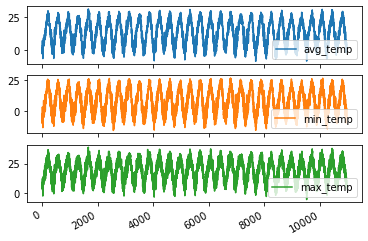

In [5]:
# 10년동안 기온이 어떻게 되었는지 pandas 내부 plot으로 그려볼게요.
df[['avg_temp', 'min_temp', 'max_temp']].plot(subplots=True)

In [6]:
# DataFrame을 년도별로 잘라서 list에 저장하도록 할게요.
# min()함수는 python 내장함수로, ()안의 값 중에 최소값을 반환해줘요.
# max()함수도 python 내장함수로, ()안의 값 중에 최대값을 반환해줘요.
years = []
for year in range(min(df['year']), max(df['year'])+1):
    years.append(df[df['year']==year])
print(years)

[     year month day  avg_temp  min_temp  max_temp
0    1990    01  01      -0.5      -6.2       8.7
1    1990    01  02      -0.2      -4.8       5.4
2    1990    01  03      -0.5      -4.5       3.8
3    1990    01  04      -2.9     -10.0       7.1
4    1990    01  05      -0.5      -7.9       8.6
..    ...   ...  ..       ...       ...       ...
360  1990    12  27      -3.1      -8.2       3.5
361  1990    12  28      -1.1      -7.4       6.2
362  1990    12  29       0.5      -4.4       6.3
363  1990    12  30      -0.5      -7.2       7.2
364  1990    12  31       6.2       3.0      10.0

[365 rows x 6 columns],      year month day  avg_temp  min_temp  max_temp
365  1991    01  01       4.2      -0.3       8.2
366  1991    01  02       1.4      -1.2       4.2
367  1991    01  03       0.2      -6.1       5.0
368  1991    01  04      -0.3      -2.1       2.8
369  1991    01  05      -2.1      -4.2       1.3
..    ...   ...  ..       ...       ...       ...
725  1991    12  27     

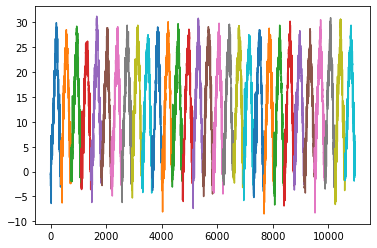

In [8]:
# 평균 기온의 변화를 plot으로 그려볼게요.
for year in years:
    year['avg_temp'].plot()

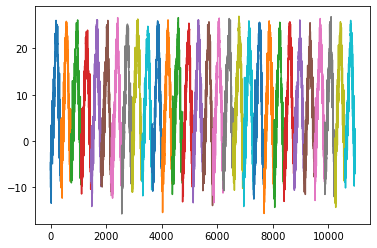

In [9]:
# 최저 기온의 변화를 plot으로 그려볼게요.
for year in years:
    year['min_temp'].plot()

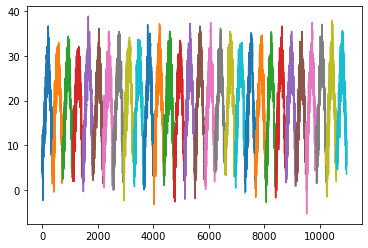

In [10]:
# 최고 기온의 변화를 plot으로 그려볼게요.
for year in years:
    year['max_temp'].plot()

In [11]:
# 데이터를 학습데이터랑 평가데이터로 나눌게요.
# 학습데이터는 2010년~2018년의 데이터이고,
# 평가데이터는 2019년의 데이터에요.
# dataFrame.values[:, 3:]에서 앞의 : 은 전체 열을 의미하고,
# 뒤에 3: 은 각 열에서 3번째 행부터 끝가지를 가져오겠다는 의미에요.
train_dataset = df[df['year'] < 2019].dropna().values[:, 3:]
test_dataset = df[df['year'] == 2019].dropna().values[:, 3:]

# 학습데이터랑 평가데이터로 나눈 데이터를 
# 다시 평균, 최소, 최대 기온 3개로 나눌게요.
avg_data_train_set = train_dataset[:, 0]
min_data_train_set = train_dataset[:, 1]
max_data_train_set = train_dataset[:, 2]

avg_data_test_set = test_dataset[:, 0]
min_data_test_set = test_dataset[:, 1]
max_data_test_set = test_dataset[:, 2]

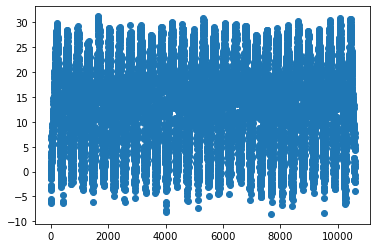

In [12]:
# 평균 기온의 학습데이터를 matplotlib의 scatter로 그려볼게요.
x = range(len(avg_data_train_set))
plt.scatter(x, avg_data_train_set)
plt.show()

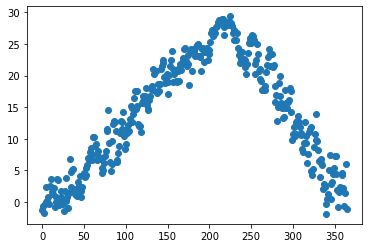

In [13]:
# 평균 기온의 평가데이터를 matplotlib의 scatter로 그려볼게요.
x = range(len(avg_data_test_set))
plt.scatter(x, avg_data_test_set)
plt.show()

In [14]:
# 데이터를 입력이랑 타겟으로 나누는 함수를 작성할게요.
# data는 전체 데이터를 뜻하고
# seek_step은 입력으로 몇개의 데이터를 사용할거냐를 뜻해요.
# features는 하나의 데이터가 몇개의 수치로 이루어져있나를 뜻해요.
def div_xy(data, seek_step, features):
    x, y = [], []
    for i in range(len(data)-seek_step-1):
        x.append(data[i:i+seek_step])
        y.append(data[i+seek_step])
    return np.array(x, dtype=np.float).reshape(-1, seek_step, features), np.array(y, dtype=np.float).reshape(-1, features)

In [15]:
# 이번 실습에서 사용할 seek_step과 features 설정이에요.
# 이번 실습에서 seek_step은 예를들어 내일의 기온을 예측하기위해서
# 몇 일전까지의 기온을 볼것일가를 뜻해요. 총 5일의 데이터를 사용하겠다는 뜻이에요.
# features는 예를들어, 하루의 평균 기온 데이터는 몇개인가를 뜻해요.
# 하루 평균 기온은 하나뿐이에요.
seek_step = 5
features = 1

In [16]:
# 작성한 함수를 사용해서 데이터를 입력이랑 타겟으로 나눠주고, 확인할게요.
x_train, y_train = div_xy(avg_data_train_set, seek_step, features)
x_test, y_test = div_xy(avg_data_test_set, seek_step, features)
# shape 한번 봐주세요.
print(x_train.shape)
print(y_train.shape)
print('''-------------------------------------''')

# 즉, [-4.8 0.4 -0.4 -0.4 -2] 다음에 -4.2가 나왔었다는 의미에요.
# range()안 숫자 조금 늘려서 확인해 보실게요.
for i in range(1):
    print(x_train[i], end=' : ')
    print(y_train[i])

(10584, 5, 1)
(10584, 1)
-------------------------------------
[[-0.5]
 [-0.2]
 [-0.5]
 [-2.9]
 [-0.5]] : [3.]


In [17]:
# loss 확인용 클래스 작성할게요.
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

In [18]:
# 모델 생성하고 컴파일 진행할게요.
history = LossHistory()
history.init()

model = Sequential()
model.add(SimpleRNN(units=256))#, batch_input_shape=(5,seek_step,features)))
model.add(Dense(features))
model.compile(loss='mse', optimizer='RMSprop', metrics=['accuracy'])

In [19]:
# 평균 기온 데이터 모델에 학습할게요.
model.fit(x_train, y_train, epochs=10, batch_size=5, callbacks=[history])

Epoch 1/10
2117/2117 [==============================] - 4s 2ms/step - loss: 6.0869 - accuracy: 0.0027
Epoch 2/10
2117/2117 [==============================] - 4s 2ms/step - loss: 4.6638 - accuracy: 0.0031
Epoch 3/10
2117/2117 [==============================] - 4s 2ms/step - loss: 4.5202 - accuracy: 0.0029
Epoch 4/10
2117/2117 [==============================] - 4s 2ms/step - loss: 4.5268 - accuracy: 0.0031
Epoch 5/10
2117/2117 [==============================] - 4s 2ms/step - loss: 4.4040 - accuracy: 0.0030
Epoch 6/10
2117/2117 [==============================] - 4s 2ms/step - loss: 4.3557 - accuracy: 0.0030
Epoch 7/10
2117/2117 [==============================] - 4s 2ms/step - loss: 4.3268 - accuracy: 0.0029
Epoch 8/10
2117/2117 [==============================] - 4s 2ms/step - loss: 4.2620 - accuracy: 0.0033
Epoch 9/10
2117/2117 [==============================] - 4s 2ms/step - loss: 4.2770 - accuracy: 0.0034
Epoch 10/10
2117/2117 [==============================] - 4s 2ms/step - loss: 4.222

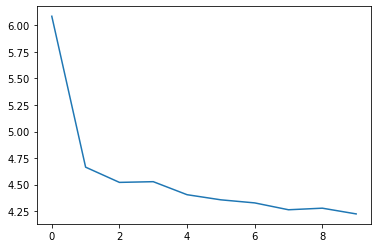

In [20]:
# Loss를 plot으로 한번 확인해 볼게요.
loss = history.losses
epochs = range(len(loss))
plt.plot(epochs, loss)
plt.show()

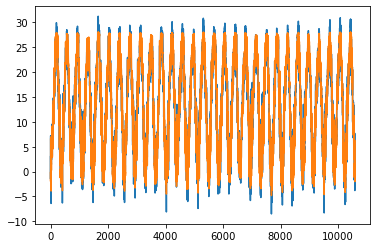

In [21]:
# 모델에 학습시킨 데이터로 모델을 한번 확인해 볼게요.
y_hat = []
for trained_x in x_train:
    trained_x = trained_x.reshape(1, seek_step, features)
    y_hat.append(model.predict(trained_x))
    
length = range(len(y_hat))
plt.plot(length, y_train, np.squeeze(y_hat))
plt.show()

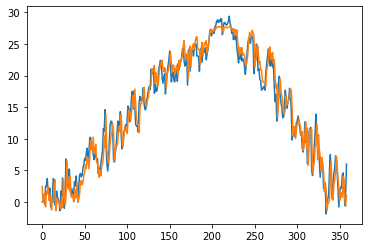

In [22]:
# 테스트 데이터로도 모델 확인 해볼게요.
y_hat = []
for test_x in x_test:
    test_x = test_x.reshape(1, seek_step, features)
    y_hat.append(model.predict(test_x))
length = range(len(y_hat))
plt.plot(length, y_test, np.squeeze(y_hat))
plt.show()

# 마음에 안드니까 학습을 한번 더해요. model.fit()이 작성된 셀부터
# 현재 셀까지 한번더 실행시켜 주세요.

In [23]:
# 모델 SVG나 summary로 구조 구성 확인해보세요.
# 마음에 안드시면 모델 수정하셔도 되요.

In [24]:
# 나머지는 평균에서 최저, 최고 기온으로 바꾸고 실험하는거랑
# 한번에 평균, 최저, 최고를 전부 사용하는 실험이에요.
# 한번 진행해보세요.

In [25]:
# 최저 기온 데이터 -> 입력, 출력 으로 나누기
x_train, y_train = div_xy(min_data_train_set, seek_step, features)
x_test, y_test = div_xy(min_data_test_set, seek_step, features)

In [26]:
# 새로운 모델 생성 및 컴파일

history = LossHistory()
history.init()

model = Sequential()
model.add(SimpleRNN(units=256, batch_input_shape=(1,seek_step,features)))
model.add(Dense(features))
model.compile(loss='mse', optimizer='RMSprop', metrics=['accuracy'])

In [27]:
# 최저 기온 데이터 모델에 학습
model.fit(x_train, y_train, epochs=10, batch_size=1, callbacks=[history])

Epoch 1/10
10584/10584 [==============================] - 13s 1ms/step - loss: 10.4394 - accuracy: 0.0033
Epoch 2/10
10584/10584 [==============================] - 13s 1ms/step - loss: 9.1849 - accuracy: 0.0034
Epoch 3/10
10584/10584 [==============================] - 14s 1ms/step - loss: 9.0750 - accuracy: 0.0033
Epoch 4/10
10584/10584 [==============================] - 13s 1ms/step - loss: 8.9504 - accuracy: 0.0035
Epoch 5/10
10584/10584 [==============================] - 13s 1ms/step - loss: 8.8916 - accuracy: 0.0033
Epoch 6/10
10584/10584 [==============================] - 14s 1ms/step - loss: 8.8776 - accuracy: 0.0032
Epoch 7/10
10584/10584 [==============================] - 13s 1ms/step - loss: 8.7899 - accuracy: 0.0038
Epoch 8/10
10584/10584 [==============================] - 13s 1ms/step - loss: 8.7603 - accuracy: 0.0034
Epoch 9/10
10584/10584 [==============================] - 13s 1ms/step - loss: 8.7563 - accuracy: 0.0035
Epoch 10/10
10584/10584 [=============================

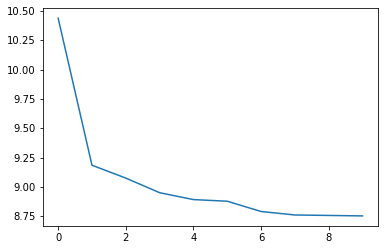

In [28]:
# Loss 확인
loss = history.losses
epochs = range(len(loss))
plt.plot(epochs, loss)
plt.show()

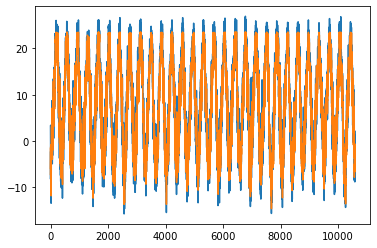

In [29]:
# 학습한 데이터로 모델 확인
y_hat = []
for trained_x in x_train:
    trained_x = trained_x.reshape(1, seek_step, features)
    y_hat.append(model.predict(trained_x))
length = range(len(y_hat))
plt.plot(length, y_train, np.squeeze(y_hat))
plt.show()


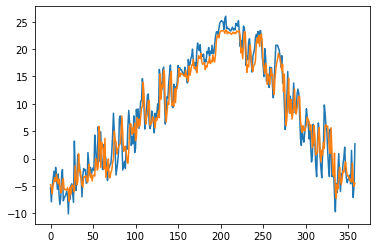

In [30]:
# 테스트 데이터로 모델 확인
y_hat = []
for test_x in x_test:
    test_x = test_x.reshape(1, seek_step, features)
    y_hat.append(model.predict(test_x))
length = range(len(y_hat))
plt.plot(length, y_test, np.squeeze(y_hat))
plt.show()

In [31]:
# 최고 기온 데이터 -> 입력, 출력으로 나누기
x_train, y_train = div_xy(max_data_train_set, seek_step, features)
x_test, y_test = div_xy(max_data_test_set, seek_step, features)

In [32]:
# 새로운 모델 생성 및 컴파일
history = LossHistory()
history.init()

model = Sequential()
model.add(SimpleRNN(units=256, batch_input_shape=(1,seek_step,features)))
model.add(Dense(features))
model.compile(loss='mse', optimizer='RMSprop', metrics=['accuracy'])

In [33]:
# 최고 기온 데이터 모델에 학습
model.fit(x_train, y_train, epochs=10, batch_size=1, callbacks=[history])

Epoch 1/10
10584/10584 [==============================] - 14s 1ms/step - loss: 13.3030 - accuracy: 3.7793e-04
Epoch 2/10
10584/10584 [==============================] - 14s 1ms/step - loss: 11.5308 - accuracy: 3.7793e-04
Epoch 3/10
10584/10584 [==============================] - 14s 1ms/step - loss: 11.2212 - accuracy: 3.7793e-04
Epoch 4/10
10584/10584 [==============================] - 14s 1ms/step - loss: 11.1456 - accuracy: 3.7793e-04
Epoch 5/10
10584/10584 [==============================] - 14s 1ms/step - loss: 11.1319 - accuracy: 3.7793e-04
Epoch 6/10
10584/10584 [==============================] - 14s 1ms/step - loss: 10.8822 - accuracy: 3.7793e-04
Epoch 7/10
10584/10584 [==============================] - 14s 1ms/step - loss: 10.9016 - accuracy: 3.7793e-04
Epoch 8/10
10584/10584 [==============================] - 14s 1ms/step - loss: 10.7010 - accuracy: 3.7793e-04
Epoch 9/10
10584/10584 [==============================] - 14s 1ms/step - loss: 10.7148 - accuracy: 3.7793e-04
Epoch 10/1

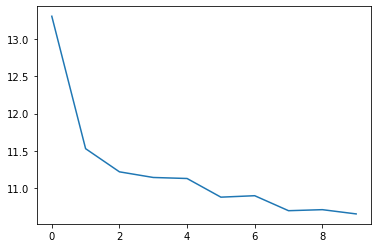

In [34]:
# Loss 확인
loss = history.losses
epochs = range(len(loss))
plt.plot(epochs, loss)
plt.show()

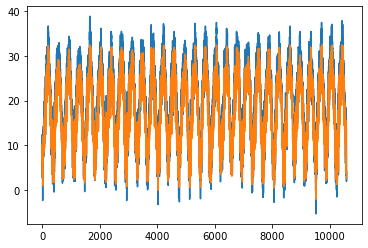

In [35]:
# 학습한 데이터로 모델 확인
y_hat = []
for trained_x in x_train:
    trained_x = trained_x.reshape(1, seek_step, features)
    y_hat.append(model.predict(trained_x))
length = range(len(y_hat))
plt.plot(length, y_train, np.squeeze(y_hat))
plt.show()

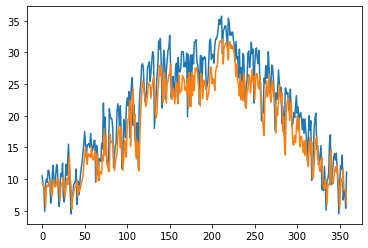

In [36]:
# 테스트 데이터로 모델 확인
y_hat = []
for test_x in x_test:
    test_x = test_x.reshape(1, seek_step, features)
    y_hat.append(model.predict(test_x))
length = range(len(y_hat))
plt.plot(length, y_test, np.squeeze(y_hat))
plt.show()

In [37]:
# 평균, 최저, 최고 기온 한번에 사용하기
dataset = df.dropna().values[:, 3:]
train_dataset = df[df['year'] < 2019].dropna().values[:, 3:]
test_dataset = df[df['year'] == 2019].dropna().values[:, 3:]
print(train_dataset[:5])
print(test_dataset[:5])

[[-0.5 -6.2 8.7]
 [-0.2 -4.8 5.4]
 [-0.5 -4.5 3.8]
 [-2.9 -10.0 7.1]
 [-0.5 -7.9 8.6]]
[[-1.3 -7.6 6.3]
 [-0.6 -6.9 7.0]
 [-1.8 -8.9 9.4]
 [-0.4 -8.4 6.1]
 [2.3 -4.8 10.5]]


In [38]:
# Sequence 길이와 feature 개수 설정 및 데이터 나누기
seek_step = 5
features = 3

x_train, y_train = div_xy(train_dataset, seek_step, features)
x_test, y_test = div_xy(test_dataset, seek_step, features)
print(x_train.shape)
print(y_train.shape)
for i in range(5):
    print(x_train[i], end=' : ')
    print(y_train[i])

(10584, 5, 3)
(10584, 3)
[[ -0.5  -6.2   8.7]
 [ -0.2  -4.8   5.4]
 [ -0.5  -4.5   3.8]
 [ -2.9 -10.    7.1]
 [ -0.5  -7.9   8.6]] : [ 3.  -2.4  6. ]
[[ -0.2  -4.8   5.4]
 [ -0.5  -4.5   3.8]
 [ -2.9 -10.    7.1]
 [ -0.5  -7.9   8.6]
 [  3.   -2.4   6. ]] : [-1.5 -8.2  8.4]
[[ -0.5  -4.5   3.8]
 [ -2.9 -10.    7.1]
 [ -0.5  -7.9   8.6]
 [  3.   -2.4   6. ]
 [ -1.5  -8.2   8.4]] : [ 0.4 -7.5  9.7]
[[ -2.9 -10.    7.1]
 [ -0.5  -7.9   8.6]
 [  3.   -2.4   6. ]
 [ -1.5  -8.2   8.4]
 [  0.4  -7.5   9.7]] : [ 6.5  3.4 11.1]
[[-0.5 -7.9  8.6]
 [ 3.  -2.4  6. ]
 [-1.5 -8.2  8.4]
 [ 0.4 -7.5  9.7]
 [ 6.5  3.4 11.1]] : [ 7.2  0.1 12.4]


In [39]:
# 새로운 모델 생성 및 컴파일
history = LossHistory()
history.init()

model = Sequential()
model.add(SimpleRNN(units=256, batch_input_shape=(1,seek_step,features)))
model.add(Dense(features))
model.compile(loss='mse', optimizer='RMSprop', metrics=['accuracy'])

In [40]:
# (평균, 최저, 최고) 기온 모델에 학습
model.fit(x_train, y_train, epochs=10, batch_size=1, callbacks=[history])

Epoch 1/10
10584/10584 [==============================] - 14s 1ms/step - loss: 8.5818 - accuracy: 0.9997
Epoch 2/10
10584/10584 [==============================] - 14s 1ms/step - loss: 7.4938 - accuracy: 1.0000
Epoch 3/10
10584/10584 [==============================] - 14s 1ms/step - loss: 7.2247 - accuracy: 0.9997
Epoch 4/10
10584/10584 [==============================] - 14s 1ms/step - loss: 7.0654 - accuracy: 1.0000
Epoch 5/10
10584/10584 [==============================] - 14s 1ms/step - loss: 6.9054 - accuracy: 1.0000
Epoch 6/10
10584/10584 [==============================] - 14s 1ms/step - loss: 6.9184 - accuracy: 1.0000
Epoch 7/10
10584/10584 [==============================] - 14s 1ms/step - loss: 6.8164 - accuracy: 1.0000
Epoch 8/10
10584/10584 [==============================] - 14s 1ms/step - loss: 6.8404 - accuracy: 1.0000
Epoch 9/10
10584/10584 [==============================] - 14s 1ms/step - loss: 6.7524 - accuracy: 0.9998
Epoch 10/10
10584/10584 [==============================

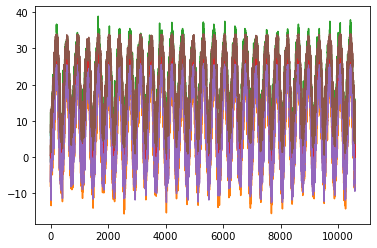

In [41]:
# 학습한 데이터로 모델 확인
y_hat = []
for trained_x in x_train:
    trained_x = trained_x.reshape(1, seek_step, features)
    y_hat.append(model.predict(trained_x))
length = range(len(y_hat))
plt.plot(length, y_train, np.squeeze(y_hat))
plt.show()

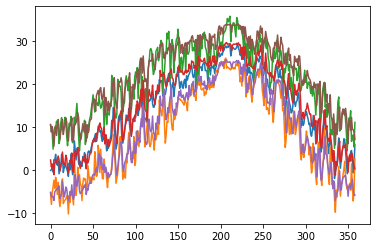

In [42]:
# 테스트 데이터로 모델 확인
y_hat = []
for test_x in x_test:
    test_x = test_x.reshape(1, seek_step, features)
    y_hat.append(model.predict(test_x))
length = range(len(y_hat))
plt.plot(length, y_test, np.squeeze(y_hat))
plt.show()

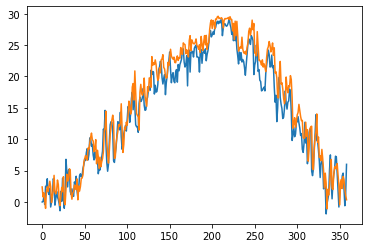

In [43]:
# 한번에 학습한 모델이 예측한 평균기온 확인
plt.plot(length, np.squeeze(y_test)[:, 0], np.squeeze(y_hat)[:,0])
plt.show()

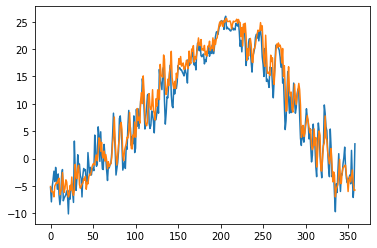

In [44]:
# 한번에 학습한 모델이 예측한 최저기온 확인
plt.plot(length, np.squeeze(y_test)[:, 1], np.squeeze(y_hat)[:,1])
plt.show()

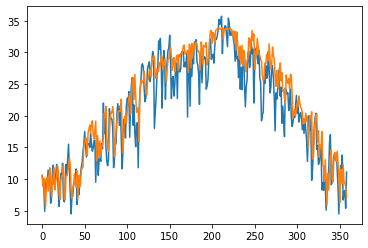

In [45]:
# 한번에 학습한 모델이 예측한 최고기온 확인
plt.plot(length, np.squeeze(y_test)[:, 2], np.squeeze(y_hat)[:,2])
plt.show()